In [1]:
import dataloader

In [2]:
sequence_length = 500
crop_end = 2
n_train = 2400
n_test = 100
n_data = sequence_length * (n_train + n_test)
input_length = 21
percept_length = 18

print 'load data ({0})...'.format(n_data)
data = dataloader.get_data(0, n_data + 1)
inputs, percepts = dataloader.make_batches(data, sequence_length, crop_end=crop_end)
x_train = inputs[:n_train]
y_train = percepts[:n_train]

x_test = inputs[n_train:]
y_test = percepts[n_train:]

load data (1250000)...


In [3]:
print x_train.shape, y_train.shape, x_test.shape, y_test.shape
print x_test[0, 1]
print '=================='
print y_test[0, 0]

(2400, 498, 21) (2400, 498, 18) (100, 498, 21) (100, 498, 18)
[ 0.          0.          0.          0.          0.          0.06222387
  0.          0.          0.          0.07757615  0.08230664  0.08631713
  0.0891002   0.09022337  0.08949184  0.08703385  0.08324369  0.07862641
  0.          1.          0.        ]
[ 0.          0.          0.          0.          0.          0.06222387
  0.          0.          0.          0.07757615  0.08230664  0.08631713
  0.0891002   0.09022337  0.08949184  0.08703385  0.08324369  0.07862641]


In [4]:
def plot_states_interleaved(actual, prediction=None, color_actual='#99ccee', color_prediction='#44ddff', errorvis=True):
    if prediction is not None:
        assert actual.shape[0] == prediction.shape[0]
    n_steps = actual.shape[0]
    ylim = (0, 1)
    fig = plt.figure(figsize=(12, n_steps*2.))
    fig.suptitle('Prediction: {0}'.format(prediction is not None), fontsize=14)
    # fig.set_facecolor('#999999')
    for i in xrange(n_steps):
        ax = fig.add_subplot(n_steps, 1, i+1)
        # ax.set_axis_bgcolor('#999999')
            
        if prediction is not None:
            if errorvis:
#                 ax.bar(np.arange(prediction.shape[1])-0.5, 
#                        prediction[i], 
#                        width=0.35, 
#                        color='r', 
#                        alpha=1.0,
#                        linewidth=0, 
#                        align='center')
#                 ax.bar(np.arange(actual.shape[1])-0.5, actual[i], color=color_actual, linewidth=0, align='center')
#                 ax.bar(np.arange(prediction.shape[1])-0.5, 
#                        actual[i, :prediction.shape[1]], 
#                        width=0.35, 
#                        color='r', 
#                        alpha=1.0,
#                        linewidth=0, 
#                        align='center')
#                 ax.bar(np.arange(prediction.shape[1])-0.5, 
#                        np.minimum(actual[i, :prediction.shape[1]], prediction[i]), 
#                        width=0.35, 
#                        color='#555555', 
#                        alpha=1.0,
#                        linewidth=0, 
#                        align='center')
                ax.bar(np.arange(actual.shape[1])-0.5, actual[i], color=color_actual, linewidth=0, align='center')
                ax.bar(np.arange(prediction.shape[1])-0.5,
                       actual[i, :prediction.shape[1]] - prediction[i], 
                       bottom = prediction[i],
                       width=0.35, 
                       color='#660000', 
                       alpha=1.0,
                       linewidth=0, 
                       align='center')
                
            else:
                ax.bar(np.arange(actual.shape[1])-0.5, actual[i], color=color_actual, linewidth=0, align='center')
                ax.bar(np.arange(prediction.shape[1])-0.5, prediction[i], 
                       width=0.35, 
                       color=color_prediction, 
                       alpha=0.7,
                       linewidth=0, 
                       align='center')
        else:
            ax.bar(np.arange(actual.shape[1])-0.5, actual[i], color=color_actual, linewidth=0, align='center')
            
        ax.set_xlim(0, 20.5)
        ax.axvline(x=8.0, color='#cccccc')
        ax.axvline(x=17.0, color='#cccccc')
        ax.get_xaxis().set_visible(False)
        ax.set_ylim(ylim[0], ylim[1])

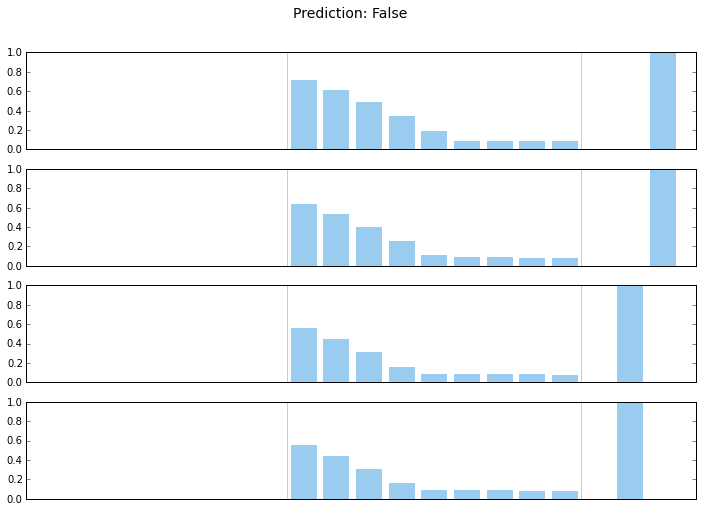

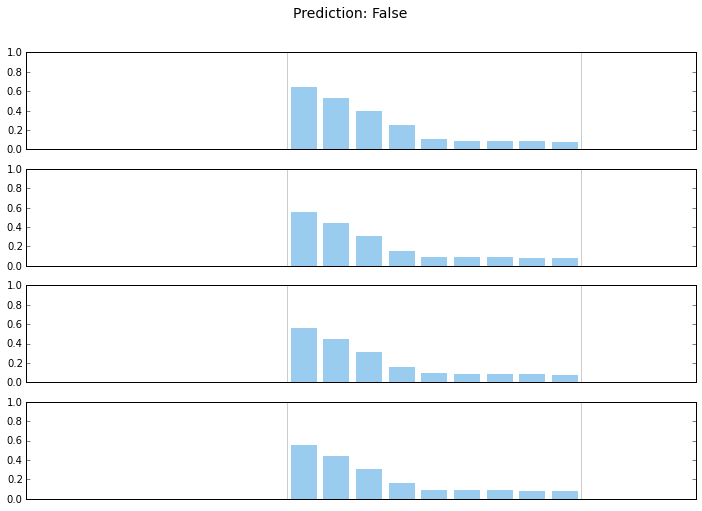

In [5]:
n_plot = 4

plot_states_interleaved(x_test[98, -n_plot:])
plot_states_interleaved(y_test[98, -n_plot:])

# print x_test[0, -1]
# print y_test[0, -2]

    
plt.show()

In [6]:
import time
from keras.models import model_from_json

In [7]:
print 'Loading and compiling model. This may take a while.'
dir_name = '20151025out_6500/'
architecture_filename = dir_name + 'json.dat'
weights_filename = dir_name + 'model_checkpoint.h5'

time.sleep(0.1)


tic = time.time()
print 'loading model architecture...'
model = model_from_json(open(architecture_filename).read())

print 'loading model weights...'
model.load_weights(weights_filename)
toc = time.time()
print 'loading the model took {0} seconds'.format(toc - tic)

Loading and compiling model. This may take a while.
loading model architecture...
loading model weights...
loading the model took 80.5435199738 seconds


/usr/local/lib/python2.7/site-packages/theano/scan_module/scan_perform_ext.py:135: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


#### Performance on Training set 

In [8]:
pred_train = model.predict(x_train)
actual_train = y_train

print np.mean((actual_train-pred_train) ** 2)

0.000879705271531


#### Performance on Test set 

In [9]:
score = model.evaluate(x_test, y_test, batch_size=1)
print score

pred = model.predict(x_test)
actual = y_test

n_display = 10
# for i in xrange(actual.shape[1]-n_display, actual.shape[1]):
# plot_data(pred[0, :n_display])
    
print np.mean((y_test-pred) ** 2)


100/100 [==============================] - 4s     
0.000887879306138
0.000887879296417


Performance w.r.t. depth:

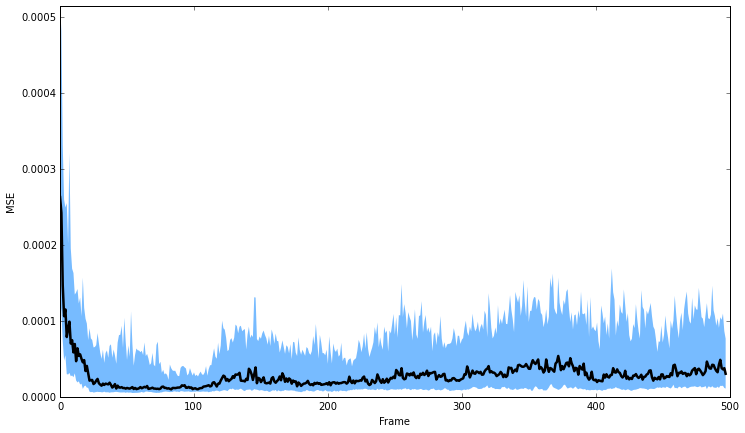

In [10]:
reduced_means_batches_times = np.mean((y_test-pred) ** 2, axis=2)

reduced_means_time_25s = np.percentile(reduced_means_batches_times, 25.0, axis=0)
reduced_means_time_medians = np.median(reduced_means_batches_times, axis=0)
reduced_means_time_75s = np.percentile(reduced_means_batches_times, 75.0, axis=0)


fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)
ax.fill_between(np.arange(y_test.shape[1]), reduced_means_time_25s, 
                reduced_means_time_75s, facecolor='#77bbff', interpolate=True, lw=0)
ax.plot(reduced_means_time_medians, color='k', lw=2.5)
ax.set_yscale('linear')
ax.set_ylim(0, np.max(reduced_means_time_75s))
ax.set_xlabel('Frame')
ax.set_ylabel('MSE')
plt.show()

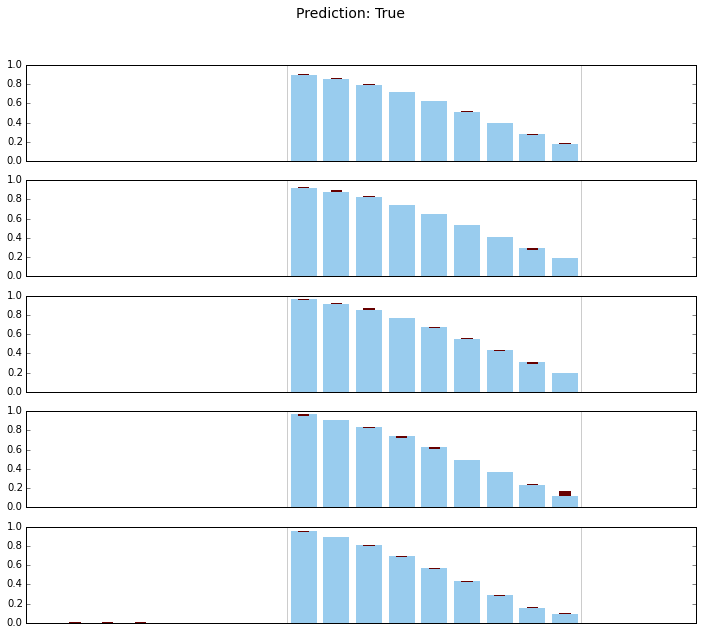

In [11]:
# Plot the n_display last images from the specified batch.
batch = 11
n_display=5
plot_states_interleaved(y_test[batch, -n_display:], pred[batch, -n_display:])

### Recursive predictions

(25, 21)
(25, 18)
(1, 50, 21)


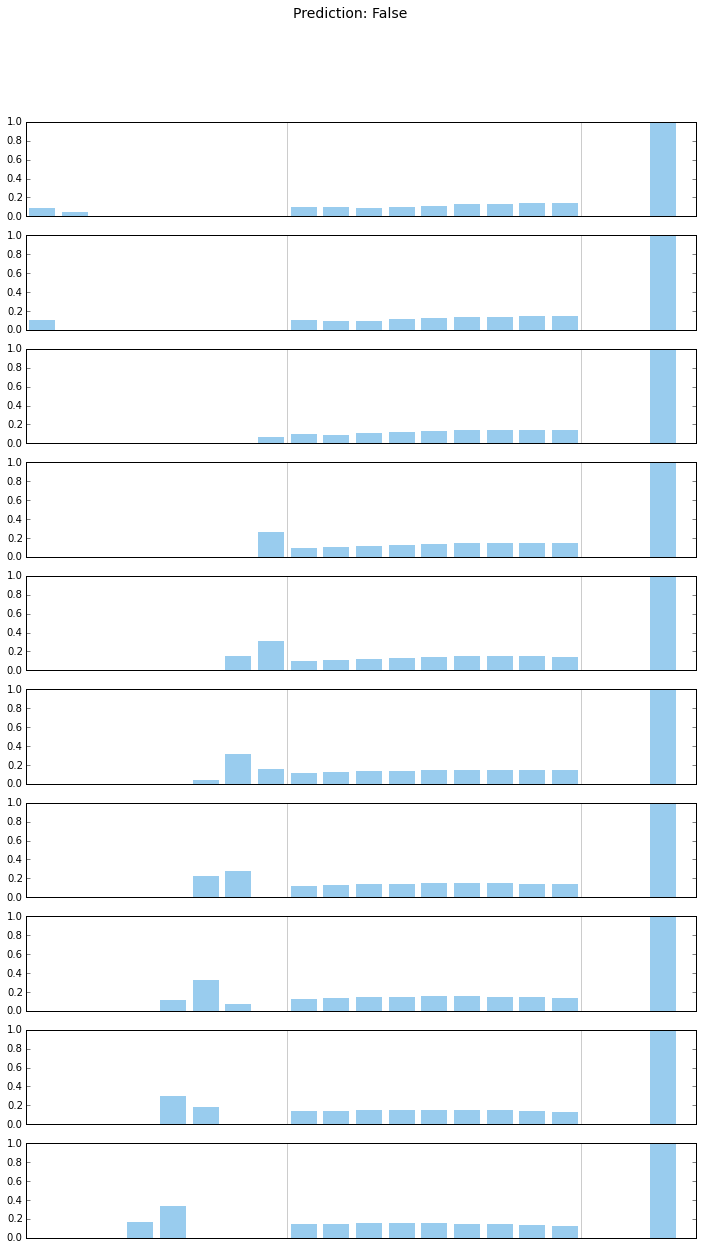

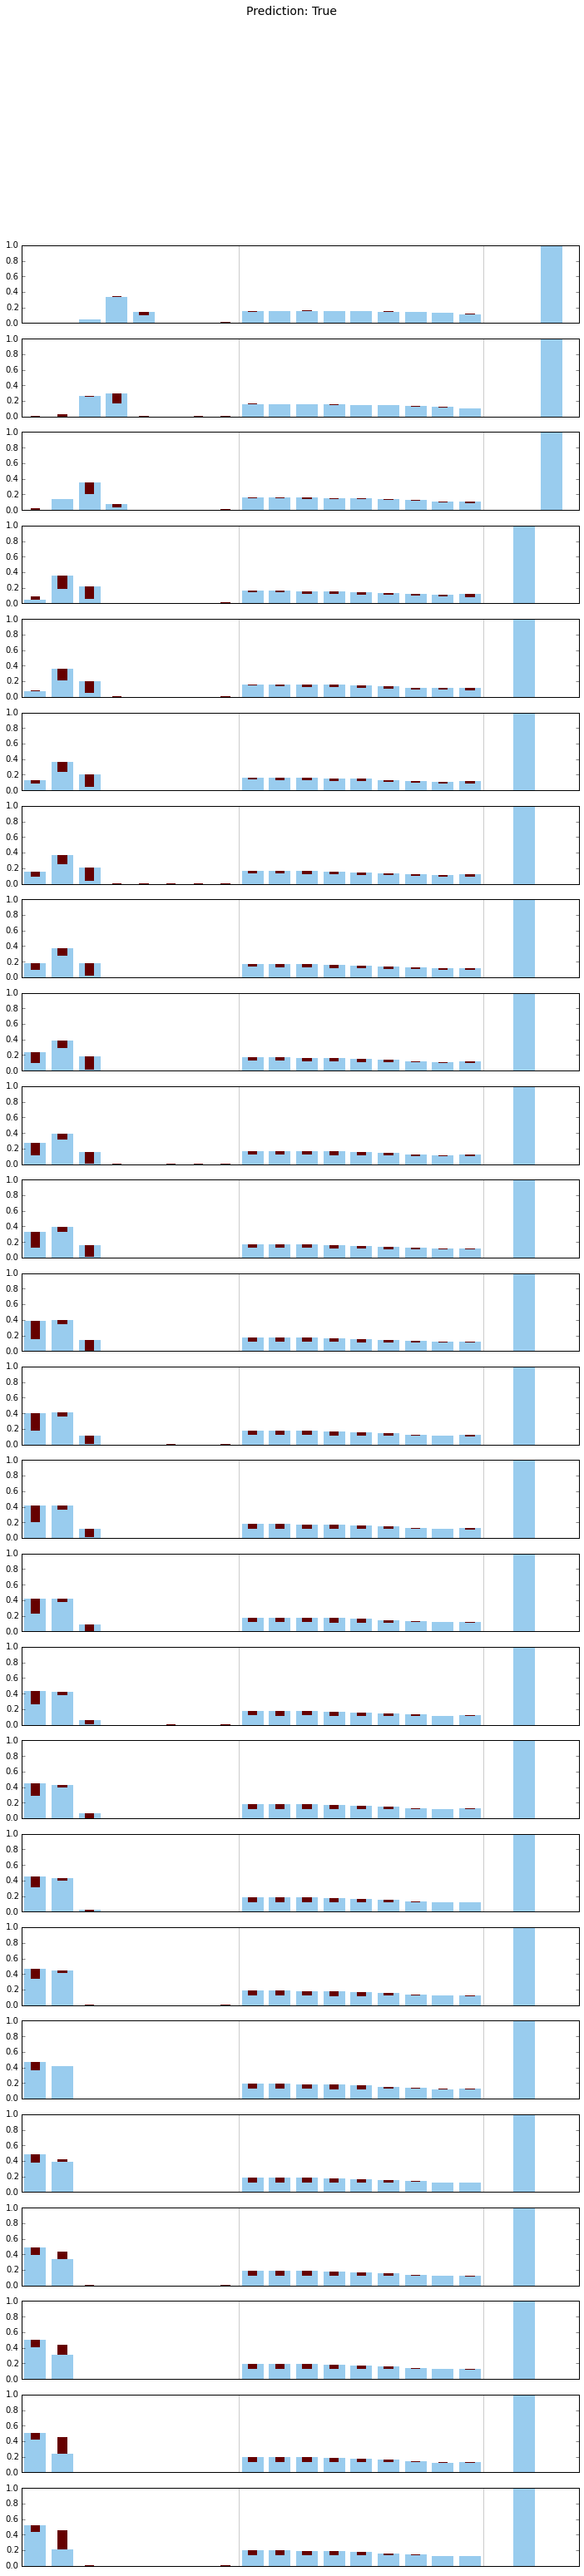

In [12]:
batch = 4
init_frames = 50
n_predict = 25
n_pre_vis = 10
past_percepts = np.array(x_test[batch: batch+1, 0:init_frames])

predictions = []
for i in xrange(n_predict):
    complete_prediction = model.predict(past_percepts)
    current_prediction = complete_prediction[0, -1]
    predictions.append(current_prediction)
    current_action = x_test[batch, init_frames+i, -3:]
    next_input = np.append(current_prediction, current_action)
    past_percepts[:-1] = past_percepts[1:]
    past_percepts[-1] = next_input


predictions = np.asarray(predictions)
actual = x_test[batch, init_frames:init_frames+n_predict]

print actual.shape
print predictions.shape
print past_percepts.shape

plot_states_interleaved(x_test[batch, init_frames-n_pre_vis: init_frames])
plot_states_interleaved(actual, predictions)

# plot_states_interleaved(x_test[batch, 245:255], y_test[batch, 244:254])


#### Evaluate recursive prediction accuracy

In [13]:
def recursive_prediction(model, past, next_actions):
    past_percepts = np.array(past)
    n_predict = next_actions.shape[0]
    
    predictions = []
    for i in xrange(n_predict):
        complete_prediction = model.predict(past_percepts)
        current_prediction = complete_prediction[0, -1]
        predictions.append(current_prediction)
        current_action = next_actions[i]
        next_input = np.append(current_prediction, current_action)
        past_percepts[:-1] = past_percepts[1:]
        past_percepts[-1] = next_input
        
    return np.array(predictions)

In [14]:
n_predict = 25
n_init = 250
errs = []
n_batches_evaluate_recursive = 2 # n_test
for batch_index in xrange(n_batches_evaluate_recursive):
    print batch_index
    for start_offset in xrange(sequence_length - n_predict - n_init - crop_end):
        pr = recursive_prediction(model=model, 
                                  past=x_test[batch_index:batch_index+1, start_offset: start_offset+n_init], 
                                  next_actions=x_test[0, start_offset+n_init: start_offset+n_init+n_predict, -3:])
        actual = x_test[batch_index, start_offset+n_init: start_offset+n_init+n_predict, :-3]
        errs.append((pr - actual) ** 2)

errs = np.asarray(errs)

0
1


In [15]:
mean_errs = np.mean(errs, axis=0)
mean_errs = np.mean(mean_errs, axis=1)


median_errs = np.median(np.mean(errs, axis=2),
                        axis=0)
errs_75 = np.percentile(np.mean(errs, axis=2), 
                        75.0, axis=0)
errs_25 = np.percentile(np.mean(errs, axis=2), 
                        25.0, axis=0)

#### Visualize recursive prediction error 

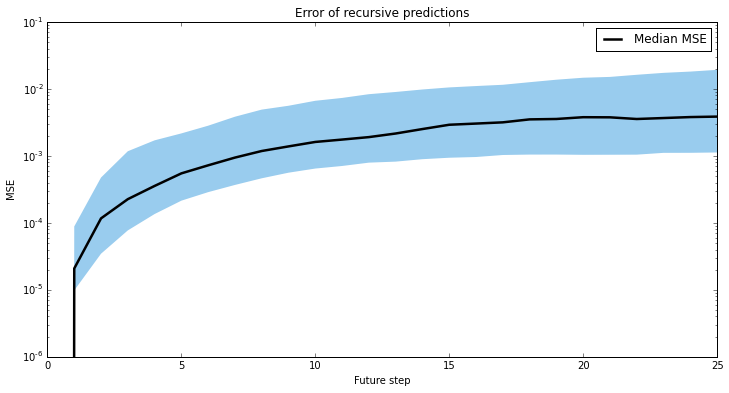

In [16]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.set_ylabel('MSE')
ax.set_xlabel('Future step')
ax.set_yscale('linear')
# ax.grid()
ax.set_title('Error of recursive predictions')
# ax.plot(np.arange(1, mean_errs.shape[0] + 1), mean_errs)
ax.fill_between(np.arange(median_errs.shape[0]+1), 
                np.append([0], errs_25),
                np.append([0], errs_75),
                facecolor='#99ccee', interpolate=True, lw=0,
                label='25% -- 75%')
ax.plot(np.append([0], median_errs), color='k', lw=2.5, label='Median MSE')
yscale='log'
ax.set_yscale(yscale)
ax.legend()
fig.savefig('plots/recursive-median-{0}.png'.format(yscale))